In [1]:
%cd ../

/home/chervovn04/Programming/hackathons/2022/agrocode


In [2]:
import pandas as pd
import numpy as np
import string
import pymorphy2
from collections import Counter
from copy import deepcopy
morph = pymorphy2.MorphAnalyzer()

In [86]:
# delete PREP
# delete !NOUN
# Flag_3 for ADJFs

In [87]:
def delete_double_spaces(nm):
    new_nm = ''
    for char in nm:
        if char != ' ' or (len(new_nm) and new_nm[-1] != ' '):
            new_nm += char
    return new_nm.strip()

def label_process(nm):
    # 1. to lower
    nm = nm.lower()
    
    contains_digits = False
    contains_parenthesis = False
    for char in nm:
        if char.isdigit():
            contains_digits = True
        if char in '()[]{}':
            contains_parenthesis = True
        
    
    # 2. delete useless sequences
    for todel in [';', '&quot']:
        nm = nm.replace(todel, '')
        
    # 3. delete text in parenthesis
    new_nm = ''
    balance = 0
    for char in nm:
        if char == '(':
            balance += 1
        elif char == ')':
            balance = max(0, balance - 1)
        elif balance == 0:
            new_nm += char
    nm = new_nm
    
    # 4. only russian symbols
    new_nm = ''
    for char in nm:
        if char in 'йцукенгшщзхъфывапролджэячсмитьбю ':
            new_nm += char
    nm = delete_double_spaces(new_nm)
    
    # 6. delete useless "words"
    # 7. convert every word to the origin form 
    
    new_nm = ''
    black_list = ['х', 'хх', 'ххх', 'мм', 'с', 'км', 'от', 'в', 'т', 'под', 'правый', 'левый']
    for word in nm.split(' '):
        if word not in black_list and len(word) > 2:
            tag = morph.parse(word)[0].tag
            if 'NOUN' not in tag:
                continue
            word = morph.parse(word)[0].normal_form 
            new_nm += word + ' '
    nm = delete_double_spaces(new_nm)
    
    # if contains_digits:
    #     nm += " Flag_1"
    # if contains_parenthesis:
    #     nm += " Flag_2"
    
    return nm

In [104]:
from tqdm import tqdm

In [114]:
cnt = {i: 0 for i in ['ADVB', 'ADVB Abbr', 'CONJ', 'INTJ', 'NOUN', 'NPRO', 'PRCL', 'PREP', 'UNKN', 'VERB']}

for _, row in tqdm(data.iterrows()):
    nm = row.processed_nm
    for word in nm:
        cnt[str(morph.parse(word)[0].tag).split(',')[0]] += 1

4876it [00:37, 129.57it/s]


In [119]:
{i:cnt[i] for i in sorted(cnt)}

{'ADVB': 4383,
 'ADVB Abbr': 2272,
 'CONJ': 11119,
 'INTJ': 75,
 'NOUN': 26813,
 'NPRO': 647,
 'PRCL': 1691,
 'PREP': 19247,
 'UNKN': 13310,
 'VERB': 5006}

In [88]:
data = pd.read_csv('data/train.csv')
data['processed_nm'] = data.item_nm.apply(label_process)

In [89]:
data.to_csv('processed.csv')

In [90]:
cnt = Counter(data.processed_nm)
print(len(cnt))
labels = [name for name, times in cnt.most_common(len(cnt)) if times > 0]

1049


In [91]:
def get_original_names(processed, threshold=1):
    cnt = Counter(list(data.item_nm[data.processed_nm  == processed]))
    return [(name, times) for name, times in cnt.most_common(len(cnt)) if times >= threshold]

In [92]:
get_original_names('шланг гидравлический')

[]

In [94]:
from sklearn.metrics import average_precision_score

In [93]:
cnt.most_common(len(cnt))

[('кольцо', 173),
 ('фильтр', 131),
 ('подшипник', 131),
 ('болт', 103),
 ('шайба', 95),
 ('втулка', 80),
 ('шланг', 76),
 ('ремень', 73),
 ('гайка', 70),
 ('винт', 65),
 ('распылитель', 64),
 ('вал', 64),
 ('палец', 57),
 ('сальник', 50),
 ('насос', 48),
 ('прокладка', 41),
 ('цепь', 41),
 ('штифт', 39),
 ('отвал', 38),
 ('пластина', 35),
 ('уплотнение', 35),
 ('диск', 34),
 ('труба', 33),
 ('клапан', 31),
 ('кронштейн', 29),
 ('прессфитинг', 29),
 ('пружина', 29),
 ('муфта', 27),
 ('рычаг', 26),
 ('штуцер соединение', 26),
 ('стекло кабинной', 24),
 ('тройник', 24),
 ('коленвал', 23),
 ('элемент', 22),
 ('трубка', 22),
 ('корпус подшипник', 21),
 ('двигатель', 21),
 ('вкладыш', 21),
 ('фильтр соединение', 21),
 ('форсунка', 21),
 ('рукав', 21),
 ('коробка отбор мощность', 20),
 ('', 20),
 ('шестерня', 20),
 ('муфта переход', 20),
 ('звёздочка', 20),
 ('сальник коленвал', 20),
 ('крышка', 19),
 ('фитинг корпус распылитель', 19),
 ('корпус распылитель форсунка', 18),
 ('нож', 18),
 ('к

In [47]:
single = [name for name, times in cnt.most_common(len(cnt)) if ' ' not in name]
not_single = [name for name, times in cnt.most_common(len(cnt)) if ' ' in name]

In [48]:
for name in single[:10]:
    print('-' * 50)
    print(name)
    for check_name in not_single:
        if name in check_name:
            print(check_name)

--------------------------------------------------
болт
болт Flag_1
болт оцинковать Flag_1
болт срезной Flag_1
болт шестиграть Flag_1
болт мхх вал карданный камаз сбор Flag_1
болт гайка Flag_1
болт крепнож гайка Flag_1
болт шатунный Flag_1
болт чрный Flag_1
болт гайка для крепление шатун
ступица болт сбор Flag_1
болт для крепление лемех Flag_1
болт гайка прессподборщик Flag_1
болт шестиграть головка Flag_1
болт для крепление нож почвофреза виракс Flag_1
болт мхх камаз вал карданный Flag_1
болт отвал Flag_1
болт шестиграть головка
болт крепление чистик колесо
болт мхх вазкамазнефаза многоцелевой Flag_1
болт крепление колесо Flag_1
болт шестиграть
болт для фреза Flag_1
болт для навеска фреза Flag_1
болт штуцерный Flag_1
болт гайка самоконтры прессподборщик Flag_1
болт мхх вал карданный мазкамаз сбор азотировать сталь Flag_1
болт штуцерный масляный трубка уралецсинтай Flag_1
болт штепсель
болт круглый головка
болт крепление шатун Flag_1
болт мхх Flag_1
------------------------------------

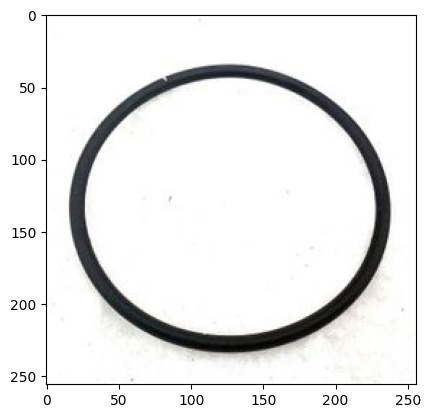

In [38]:
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
img = Image.open('data/train/6113.png')
plt.imshow(img)